In [73]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px


from sklearn.ensemble import RandomForestRegressor

In [5]:
!pip install rfpimp
import rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.5-py3-none-any.whl size=10263 sha256=d7e98f557b2675d9bf2e29fc393426e9b1a29df3e908b1d50c55da3fdefde4ef
  Stored in directory: c:\users\amela\appdata\local\pip\cache\wheels\15\88\ae\4e8850abc5088fd7e50cc7f869450d6085a0ec6d245adf8874
  Created wheel for stratx: filename=stratx-0.3-py3-none-any.whl size=22703 sha256=fca574284705d59372259bd50c3f1af5df09d0fcdf5c89d2516494d8dd36ddbd
  Stored in directory: c:\users\amela\appdata\local\pip\cache\wheels\f5\79\4f\4eee9c66cb2bf45e2067aa527c9bde3938f58e414ffdb213ec
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=a88fc82aa90cfc6da466851d1bc61cd2d6f3dcacf13fad176ffc9eff64adf838
  Stored in directory: c:\users\amela\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built rfpimp stratx sklearn


C:\Users\amela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("../data/clean/bank-additional-clean.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Divide to train and test data

In [43]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
28727,31,admin.,married,high.school,no,yes,no,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
19268,49,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
34543,26,admin.,single,university.degree,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.029,5076.2,yes
22177,33,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
25674,33,admin.,single,professional.course,no,yes,no,telephone,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,36,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11284,45,admin.,married,university.degree,no,no,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
38158,63,retired,married,basic.4y,no,yes,no,cellular,nov,fri,...,1,3,2,success,-1.1,94.767,-50.8,1.049,4963.6,yes
860,34,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


## Encoding Categorical Data

In [38]:
categorical_columns = ["job", "marital", "education", "housing", "default", "loan", "contact", "education", "day_of_week", "poutcome"]

In [44]:
for col in categorical_columns:
    df_train[col] = df_train[col].astype('category')

C:\Users\amela\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_train = pd.get_dummies(df_train)
df_train = df_train.rename(columns={'y_yes': 'y'})

In [47]:
df_train = df_train.drop(['y_no'], axis=1)

In [48]:
df_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed

In [49]:
X = df_train.loc[:, df_train.columns != 'y']
y = df_train.loc[:, df_train.columns == 'y']

In [52]:
y

,y
28727,0
19268,0
34543,1
22177,0
25674,0
...,...
6265,0
11284,0
38158,1
860,0


## Decision tree

In [12]:
model=DecisionTreeClassifier()

In [53]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

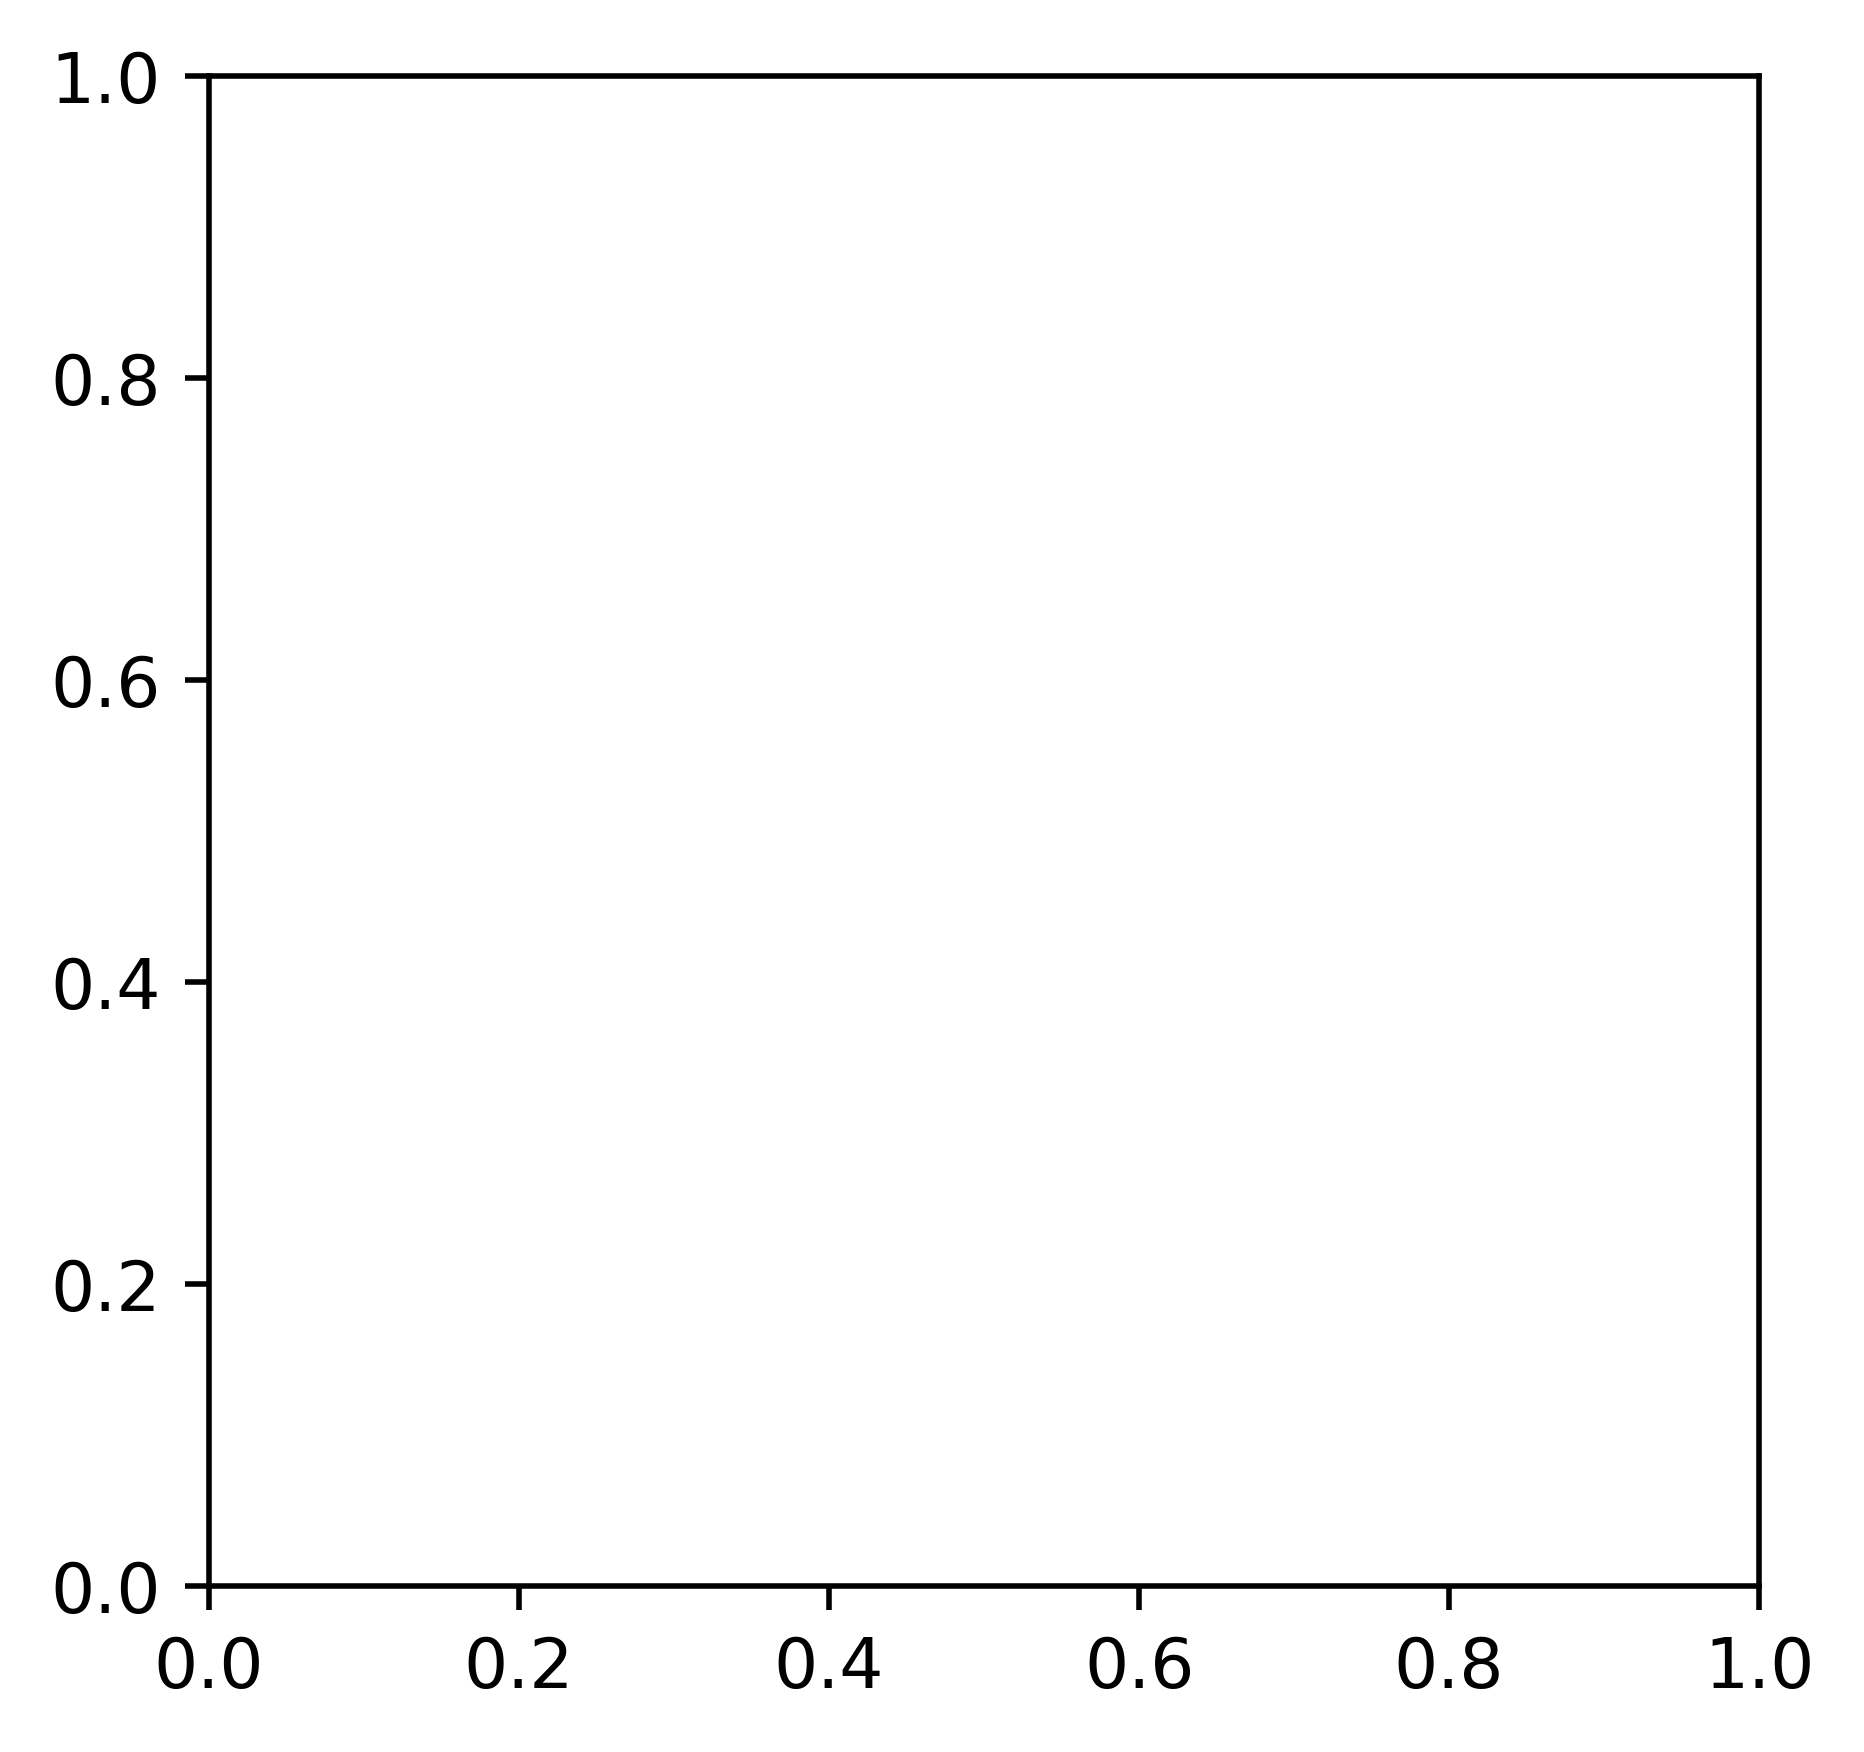

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
# tree.plot_tree(model)
# fig.savefig('tree.png')

# Traint Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Model Evaluation

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.9056068133427964

In [79]:
precision_score(y_test, y_pred)

0.5575980392156863

In [80]:
recall_score(y_test, y_pred)

0.5100896860986547

In [81]:
f1_score(y_test, y_pred)

0.5327868852459017

# K-Folds Cross Validation

In [93]:
model=DecisionTreeClassifier(max_depth=7)
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [64]:
scores

{'fit_time': array([0.25122714, 0.20776415, 0.4942863 ]),
 'score_time': array([0.03008342, 0.02544332, 0.04089236]),
 'test_accuracy': array([0.88429558, 0.8905024 , 0.88334505]),
 'test_average_precision': array([0.29096053, 0.31738404, 0.29110259]),
 'test_recall': array([0.49100529, 0.52325581, 0.4962963 ]),
 'test_f1': array([0.48434238, 0.51428571, 0.48500517])}

# Random Forest

In [118]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [66]:
rfc_scores

{'fit_time': array([3.1509335 , 3.44239855, 2.8727777 ]),
 'score_time': array([0.7495966 , 0.46875572, 0.42415142]),
 'test_accuracy': array([0.90912285, 0.90877152, 0.91274303]),
 'test_average_precision': array([0.61564036, 0.59603121, 0.63543988]),
 'test_recall': array([0.42433862, 0.45031712, 0.42116402]),
 'test_f1': array([0.50823828, 0.52237891, 0.5165477 ])}

In [119]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvement'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [95]:
report # decision tree depth 7 - the best

,Decision Tree,Random Forest,Improvement
test_accuracy,90.8,91.0,0.2
test_average_precision,56.3,61.6,5.2
test_recall,54.1,43.2,-10.9
test_f1,56.6,51.6,-5.0


In [120]:
report

,Decision Tree,Random Forest,Improvement
test_accuracy,90.8,90.6,-0.2
test_average_precision,56.3,53.9,-2.5
test_recall,54.1,39.7,-14.4
test_f1,56.6,48.4,-8.2


# Feature Importance

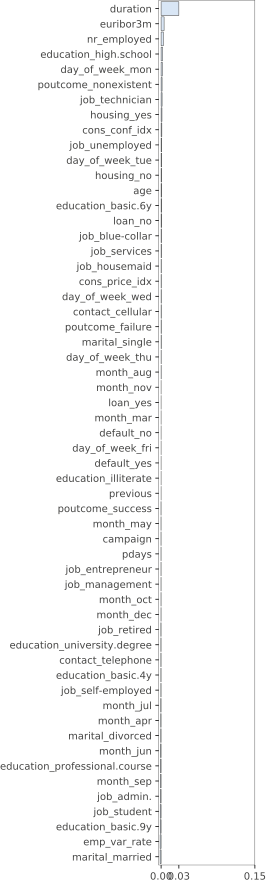

In [123]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

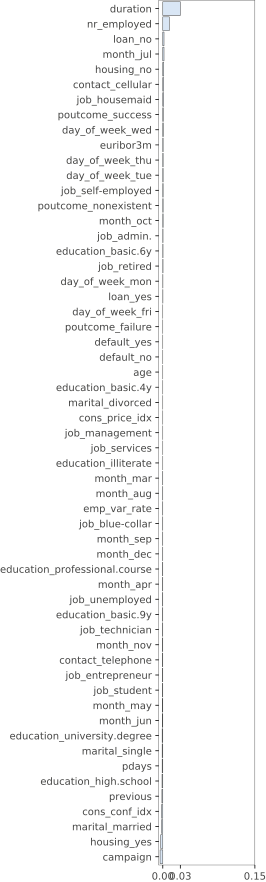

In [122]:
model=DecisionTreeClassifier(max_depth=7)
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

NameError: name 'xtr' is not defined